In [49]:
pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [50]:
import pandas as pd 
import re

import matplotlib.pyplot as plt
import seaborn as sns

#Processamento de Linguagem Natural
import nltk

from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 

In [51]:
dataframe_sentimento = pd.read_csv('dataframe_final_candidatos_pronto_para_sentimento.csv')

In [52]:
dataframe_sentimento.head ()

,Data_Hora,IdTweet,Tweet,Candidato,Tweet_limpo
0,2022-07-30 23:17:46+00:00,1553520255238119424,@LulaOficial @dilmabr Alguém de vcs checa isso...,Lula,alguém de vcs checa isso .
1,2022-07-30 23:17:46+00:00,1553520253535227906,Presidente: Lula; Senador:?; Deputado Federal:...,Lula,presidente: lula; senador:?; deputado federal:...
2,2022-07-30 23:17:45+00:00,1553520252608192512,@gleisi @LulaOficial @CamiloSantanaCE @elmanof...,Lula,"trocaram de fotógrafo, ou aprenderam a mon..."
3,2022-07-30 23:17:45+00:00,1553520251211505664,@MARCOSDANI1 @LulaOficial NÃO...BEM REAL...,Lula,não...bem real...
4,2022-07-30 23:17:45+00:00,1553520250263687168,@WesleyAHS11s @LulaOficial #BolsonaroReeleitoE...,Lula,


In [53]:
analisador_de_texto = SentimentIntensityAnalyzer()

In [54]:
dataframe_sentimento['Sentimento'] = dataframe_sentimento['Tweet_limpo'].apply(lambda i: analisador_de_texto.polarity_scores(' '.join(re.findall(r'\w+', i.lower()))))

In [55]:
dataframe_sentimento.head()

,Data_Hora,IdTweet,Tweet,Candidato,Tweet_limpo,Sentimento
0,2022-07-30 23:17:46+00:00,1553520255238119424,@LulaOficial @dilmabr Alguém de vcs checa isso...,Lula,alguém de vcs checa isso .,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,2022-07-30 23:17:46+00:00,1553520253535227906,Presidente: Lula; Senador:?; Deputado Federal:...,Lula,presidente: lula; senador:?; deputado federal:...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,2022-07-30 23:17:45+00:00,1553520252608192512,@gleisi @LulaOficial @CamiloSantanaCE @elmanof...,Lula,"trocaram de fotógrafo, ou aprenderam a mon...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,2022-07-30 23:17:45+00:00,1553520251211505664,@MARCOSDANI1 @LulaOficial NÃO...BEM REAL...,Lula,não...bem real...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,2022-07-30 23:17:45+00:00,1553520250263687168,@WesleyAHS11s @LulaOficial #BolsonaroReeleitoE...,Lula,,"{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound..."


In [56]:
dataframe_sentimento['Sentimento']

0      {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
1      {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
2      {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
3      {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
4      {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound...
                             ...                        
148    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
149    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
150    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
151    {'neg': 0.125, 'neu': 0.822, 'pos': 0.054, 'co...
152    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
Name: Sentimento, Length: 153, dtype: object

In [57]:
dataframe_sentimento['Positivo'] = dataframe_sentimento['Sentimento'].apply(lambda i:i['pos'])
dataframe_sentimento['Negativo'] = dataframe_sentimento['Sentimento'].apply(lambda i:i['neg'])
dataframe_sentimento['Neutro'] = dataframe_sentimento['Sentimento'].apply(lambda i:i['neu'])
dataframe_sentimento['Composicao'] = dataframe_sentimento['Sentimento'].apply(lambda i:i['compound'])

In [58]:
dataframe_sentimento.head()

,Data_Hora,IdTweet,Tweet,Candidato,Tweet_limpo,Sentimento,Positivo,Negativo,Neutro,Composicao
0,2022-07-30 23:17:46+00:00,1553520255238119424,@LulaOficial @dilmabr Alguém de vcs checa isso...,Lula,alguém de vcs checa isso .,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.0,1.0,0.0
1,2022-07-30 23:17:46+00:00,1553520253535227906,Presidente: Lula; Senador:?; Deputado Federal:...,Lula,presidente: lula; senador:?; deputado federal:...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.0,1.0,0.0
2,2022-07-30 23:17:45+00:00,1553520252608192512,@gleisi @LulaOficial @CamiloSantanaCE @elmanof...,Lula,"trocaram de fotógrafo, ou aprenderam a mon...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.0,1.0,0.0
3,2022-07-30 23:17:45+00:00,1553520251211505664,@MARCOSDANI1 @LulaOficial NÃO...BEM REAL...,Lula,não...bem real...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.0,1.0,0.0
4,2022-07-30 23:17:45+00:00,1553520250263687168,@WesleyAHS11s @LulaOficial #BolsonaroReeleitoE...,Lula,,"{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound...",0.0,0.0,0.0,0.0


In [59]:
sentimento = []

In [60]:
for i in dataframe_sentimento['Composicao']:
 if i >= 0.05:
   sentimento.append('Positivo')
 elif i <= (-0.05):
   sentimento.append('Negativo')
 else:   
   sentimento.append('Neutro')


In [61]:
sentimento

['Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Negativo',
 'Neutro',
 'Negativo',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Negativo',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Negativo',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Positivo',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Positivo',
 'Neutro',
 'Positivo',
 'Neutro',
 'Neutro',
 'Neutro',
 'Negativo',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Negativo',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Positivo',
 'Neutro',
 'Positivo',
 'Neutro',
 'Positivo',
 'Neutro',
 'Neutro',
 'Negativo',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Negativo',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Negativo',
 'Neutro',
 'Negativo',
 'Neutro',
 'Positivo'

In [62]:
dataframe_sentimento['Sentimento_Final'] = sentimento

In [63]:
dataframe_sentimento.head()

,Data_Hora,IdTweet,Tweet,Candidato,Tweet_limpo,Sentimento,Positivo,Negativo,Neutro,Composicao,Sentimento_Final
0,2022-07-30 23:17:46+00:00,1553520255238119424,@LulaOficial @dilmabr Alguém de vcs checa isso...,Lula,alguém de vcs checa isso .,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.0,1.0,0.0,Neutro
1,2022-07-30 23:17:46+00:00,1553520253535227906,Presidente: Lula; Senador:?; Deputado Federal:...,Lula,presidente: lula; senador:?; deputado federal:...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.0,1.0,0.0,Neutro
2,2022-07-30 23:17:45+00:00,1553520252608192512,@gleisi @LulaOficial @CamiloSantanaCE @elmanof...,Lula,"trocaram de fotógrafo, ou aprenderam a mon...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.0,1.0,0.0,Neutro
3,2022-07-30 23:17:45+00:00,1553520251211505664,@MARCOSDANI1 @LulaOficial NÃO...BEM REAL...,Lula,não...bem real...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.0,1.0,0.0,Neutro
4,2022-07-30 23:17:45+00:00,1553520250263687168,@WesleyAHS11s @LulaOficial #BolsonaroReeleitoE...,Lula,,"{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound...",0.0,0.0,0.0,0.0,Neutro


In [64]:
dataframe_sentimento['Sentimento_Final'].value_counts()

Neutro      126
Negativo     17
Positivo     10
Name: Sentimento_Final, dtype: int64

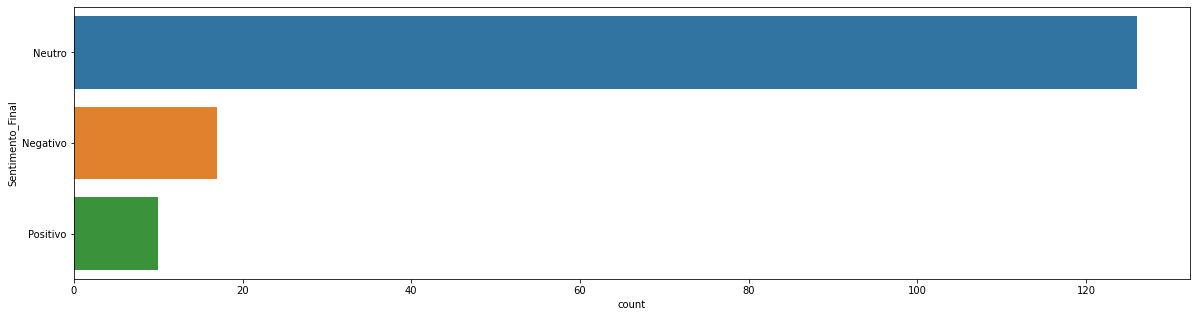

In [65]:
plt.figure(figsize = (20, 5))
sns.countplot(y='Sentimento_Final', data=dataframe_sentimento)

### Lula


In [66]:
#Pegando info de somente um candidato - criando um gráfico de só um candidato
resultado_filtro_lula = dataframe_sentimento[dataframe_sentimento['Candidato']== 'Lula']

In [67]:
resultado_filtro_lula.head()

,Data_Hora,IdTweet,Tweet,Candidato,Tweet_limpo,Sentimento,Positivo,Negativo,Neutro,Composicao,Sentimento_Final
0,2022-07-30 23:17:46+00:00,1553520255238119424,@LulaOficial @dilmabr Alguém de vcs checa isso...,Lula,alguém de vcs checa isso .,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.0,1.0,0.0,Neutro
1,2022-07-30 23:17:46+00:00,1553520253535227906,Presidente: Lula; Senador:?; Deputado Federal:...,Lula,presidente: lula; senador:?; deputado federal:...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.0,1.0,0.0,Neutro
2,2022-07-30 23:17:45+00:00,1553520252608192512,@gleisi @LulaOficial @CamiloSantanaCE @elmanof...,Lula,"trocaram de fotógrafo, ou aprenderam a mon...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.0,1.0,0.0,Neutro
3,2022-07-30 23:17:45+00:00,1553520251211505664,@MARCOSDANI1 @LulaOficial NÃO...BEM REAL...,Lula,não...bem real...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.0,1.0,0.0,Neutro
4,2022-07-30 23:17:45+00:00,1553520250263687168,@WesleyAHS11s @LulaOficial #BolsonaroReeleitoE...,Lula,,"{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound...",0.0,0.0,0.0,0.0,Neutro


In [68]:
resultado_filtro_lula['Candidato'].unique()

array(['Lula'], dtype=object)

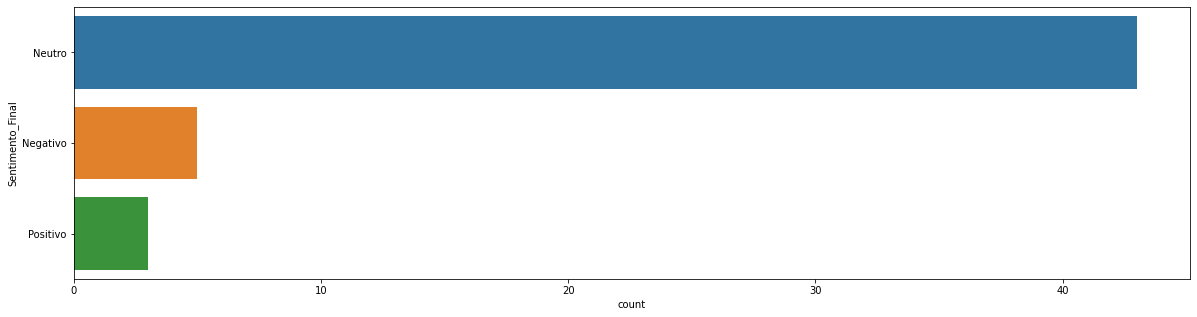

In [69]:
plt.figure(figsize = (20, 5))
sns.countplot(y='Sentimento_Final', data=resultado_filtro_lula)

In [70]:
dataframe_sentimento.head()

,Data_Hora,IdTweet,Tweet,Candidato,Tweet_limpo,Sentimento,Positivo,Negativo,Neutro,Composicao,Sentimento_Final
0,2022-07-30 23:17:46+00:00,1553520255238119424,@LulaOficial @dilmabr Alguém de vcs checa isso...,Lula,alguém de vcs checa isso .,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.0,1.0,0.0,Neutro
1,2022-07-30 23:17:46+00:00,1553520253535227906,Presidente: Lula; Senador:?; Deputado Federal:...,Lula,presidente: lula; senador:?; deputado federal:...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.0,1.0,0.0,Neutro
2,2022-07-30 23:17:45+00:00,1553520252608192512,@gleisi @LulaOficial @CamiloSantanaCE @elmanof...,Lula,"trocaram de fotógrafo, ou aprenderam a mon...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.0,1.0,0.0,Neutro
3,2022-07-30 23:17:45+00:00,1553520251211505664,@MARCOSDANI1 @LulaOficial NÃO...BEM REAL...,Lula,não...bem real...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.0,1.0,0.0,Neutro
4,2022-07-30 23:17:45+00:00,1553520250263687168,@WesleyAHS11s @LulaOficial #BolsonaroReeleitoE...,Lula,,"{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound...",0.0,0.0,0.0,0.0,Neutro


In [71]:
dataframe_final = dataframe_sentimento[['Data_Hora', 'IdTweet', 'Tweet', 'Candidato', 'Tweet_limpo', 'Sentimento_Final']]

In [72]:
dataframe_final.head()

,Data_Hora,IdTweet,Tweet,Candidato,Tweet_limpo,Sentimento_Final
0,2022-07-30 23:17:46+00:00,1553520255238119424,@LulaOficial @dilmabr Alguém de vcs checa isso...,Lula,alguém de vcs checa isso .,Neutro
1,2022-07-30 23:17:46+00:00,1553520253535227906,Presidente: Lula; Senador:?; Deputado Federal:...,Lula,presidente: lula; senador:?; deputado federal:...,Neutro
2,2022-07-30 23:17:45+00:00,1553520252608192512,@gleisi @LulaOficial @CamiloSantanaCE @elmanof...,Lula,"trocaram de fotógrafo, ou aprenderam a mon...",Neutro
3,2022-07-30 23:17:45+00:00,1553520251211505664,@MARCOSDANI1 @LulaOficial NÃO...BEM REAL...,Lula,não...bem real...,Neutro
4,2022-07-30 23:17:45+00:00,1553520250263687168,@WesleyAHS11s @LulaOficial #BolsonaroReeleitoE...,Lula,,Neutro


In [73]:
dataframe_final.to_csv('dataframe_final.csv', sep=',', index=False)